### 1. Get Train \& Test Data

In [2]:
import os 
from PIL import Image, ImageOps
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

path1 = []
path2 = []
path3 = []
path4 = []
path5 = []
path6 = []
path7 = []

# Testing just for brain_bone_window, could combine all windows
for dirname, _, filenames in os.walk('epidural/brain_bone_window'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))
    print("Number of type 0: ", len(filenames))
        
for dirname, _, filenames in os.walk('intraparenchymal/brain_bone_window'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))
    print("Number of type 1: ", len(filenames))
        
for dirname, _, filenames in os.walk('intraventricular/brain_bone_window'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))
    print("Number of type 2: ", len(filenames))
        
for dirname, _, filenames in os.walk('multi/brain_bone_window'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))  
    print("Number of type 3: ", len(filenames))

for dirname, _, filenames in os.walk('normal/brain_bone_window'):
    for filename in filenames:
        path5.append(os.path.join(dirname, filename))  
    print("Number of type 4: ", len(filenames))

for dirname, _, filenames in os.walk('subarachnoid/brain_bone_window'):
    for filename in filenames:
        path6.append(os.path.join(dirname, filename))  
    print("Number of type 5: ", len(filenames))

for dirname, _, filenames in os.walk('subdural/brain_bone_window'):
    for filename in filenames:
        path7.append(os.path.join(dirname, filename))  
    print("Number of type 6: ", len(filenames))

/Users/maxleroux/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Number of type 0:  1694
Number of type 1:  15664
Number of type 2:  9878
Number of type 3:  32074
Number of type 4:  10700
Number of type 5:  16423
Number of type 6:  32200


In [3]:
from sklearn.preprocessing import OneHotEncoder

# One Hot Encoding
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3],[4],[5], [6]])

OneHotEncoder()

In [4]:
import random


data = []
result = []

for path in path1:
    img = Image.open(path)
    img = ImageOps.grayscale(img) # Removes RGB dimension from image, not sure if this is alright
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(0)
        
for path in path2:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(1) 
        
for path in path3:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(2)
        
for path in path4:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(3)

for path in path5:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(4)
        
for path in path6:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(5)

for path in path7:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(6)

length = len(data)

indices = np.arange(length)
np.random.shuffle(indices)

# Shuffle both arrays using the shuffled indices
shuffled_data = [data[i] for i in indices]
shuffled_result = [result[i] for i in indices]

train_data = shuffled_data[0:int(length*0.4)]
train_result = shuffled_result[0:int(length*0.4)]

test_data = shuffled_data[int(length*0.4):int(length*0.5)]
test_result = shuffled_result[int(length*0.4):int(length*0.5)] # FIXME: trying to reduce data so calling fit() doesn't take forever

In [5]:
test_data = np.array(test_data)
test_data.shape

test_result = np.array(test_result)
test_result.shape

(11863,)

In [6]:
train_data = np.array(train_data)
test_data.shape

train_result = np.array(train_result)
train_result.shape

(47453,)

In [7]:
# Confirm shape of data 
print("train data: ", train_data.shape)
print("test data: ", test_data.shape)
print("train data after reshape: ", train_data.reshape(-1,128*128).shape)
print("test data after reshape: ", test_data.reshape(-1,128*128).shape)

train data:  (47453, 128, 128)
test data:  (11863, 128, 128)
train data after reshape:  (47453, 16384)
test data after reshape:  (11863, 16384)


### 2. Build the Neural Network


In [8]:
X_valid, X_train = train_data[:5000] / 255., train_data[5000:] / 255.
y_valid, y_train = train_result[:5000], train_result[5000:]
X_test = test_data / 255.
y_test = test_result / 255.
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

(42453, 128, 128) (5000, 128, 128) (11863, 128, 128)
(42453,) (5000,) (11863,)


In [9]:
print(y_train.reshape(42453,-1).reshape(42453, -1).shape)

(42453, 1)


In [10]:
y_train

array([3, 5, 3, ..., 0, 5, 6])

In [11]:
class_names = ["0", "1", "2", "3", "4", "5", "6"]

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[128, 128]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.layers

2024-04-16 16:55:22.044653: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 300)               4915500   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,946,610
Trainable params: 4,946,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
weights, biases = model.layers[1].get_weights()

weights

array([[ 0.00624145, -0.00223747, -0.00557982, ..., -0.00705057,
         0.00983666, -0.01756085],
       [ 0.0012146 , -0.00791551, -0.01495419, ...,  0.00153694,
        -0.00704478, -0.01061738],
       [-0.01577629, -0.01759288,  0.01810366, ..., -0.01080306,
         0.01815253, -0.01868817],
       ...,
       [ 0.00372475,  0.01591296, -0.00610253, ...,  0.00645785,
        -0.00081756,  0.00928183],
       [ 0.00682121, -0.0023047 , -0.00090442, ...,  0.01544421,
         0.01161724,  0.00345435],
       [-0.00477747, -0.00085977,  0.00936946, ...,  0.01443502,
        -0.0025459 , -0.0019555 ]], dtype=float32)

In [15]:
weights.shape

(16384, 300)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
biases.shape

(300,)

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### 3. Training the Neural Network model

In [19]:
# training the model and saving metrics in history
# minibatch
history = model.fit(X_train, y_train,
          batch_size=128, epochs=30,
          verbose=1,
          validation_data=(X_valid, y_valid))

Epoch 1/30
332/332 [==============================] - 20s 55ms/step - loss: 1.6971 - accuracy: 0.3224 - val_loss: 1.6907 - val_accuracy: 0.3272
Epoch 2/30
332/332 [==============================] - 11s 32ms/step - loss: 1.6518 - accuracy: 0.3419 - val_loss: 1.6750 - val_accuracy: 0.3274
Epoch 3/30
332/332 [==============================] - 9s 28ms/step - loss: 1.6317 - accuracy: 0.3534 - val_loss: 1.6493 - val_accuracy: 0.3332
Epoch 4/30
332/332 [==============================] - 11s 32ms/step - loss: 1.6198 - accuracy: 0.3586 - val_loss: 1.6411 - val_accuracy: 0.3396
Epoch 5/30
332/332 [==============================] - 9s 28ms/step - loss: 1.6087 - accuracy: 0.3632 - val_loss: 1.6409 - val_accuracy: 0.3484
Epoch 6/30
332/332 [==============================] - 8s 24ms/step - loss: 1.5999 - accuracy: 0.3682 - val_loss: 1.6439 - val_accuracy: 0.3468
Epoch 7/30
332/332 [==============================] - 9s 28ms/step - loss: 1.5897 - accuracy: 0.3749 - val_loss: 1.6396 - val_accuracy: 0.3

In [20]:
#stochastic gradient decent
historysgd = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1327/1327 [==============================] - 25s 19ms/step - loss: 1.4987 - accuracy: 0.4172 - val_loss: 1.6353 - val_accuracy: 0.3658
Epoch 2/30
1327/1327 [==============================] - 16s 12ms/step - loss: 1.4659 - accuracy: 0.4284 - val_loss: 1.6620 - val_accuracy: 0.3280
Epoch 3/30
1327/1327 [==============================] - 15s 12ms/step - loss: 1.4430 - accuracy: 0.4393 - val_loss: 1.6642 - val_accuracy: 0.3376
Epoch 4/30
1327/1327 [==============================] - 19s 14ms/step - loss: 1.4177 - accuracy: 0.4509 - val_loss: 1.5902 - val_accuracy: 0.3710
Epoch 5/30
1327/1327 [==============================] - 22s 16ms/step - loss: 1.3934 - accuracy: 0.4657 - val_loss: 1.6358 - val_accuracy: 0.3452
Epoch 6/30
1327/1327 [==============================] - 24s 18ms/step - loss: 1.3716 - accuracy: 0.4749 - val_loss: 1.6672 - val_accuracy: 0.3546
Epoch 7/30
1327/1327 [==============================] - 23s 18ms/step - loss: 1.3493 - accuracy: 0.4850 - val_loss: 1.5886 -

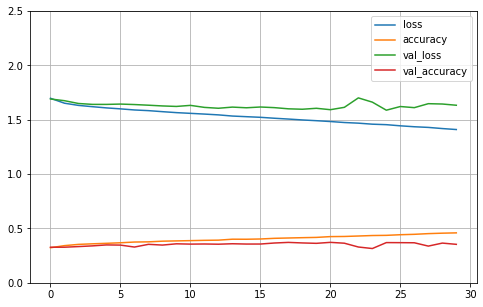

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
 
plt.show()

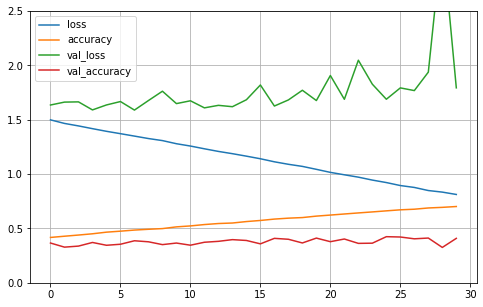

In [22]:
pd.DataFrame(historysgd.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
 
plt.show()

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.01, 0.13, 0.46, 0.2 , 0.11, 0.09, 0.  , 0.  , 0.  ],
       [0.  , 0.06, 0.  , 0.  , 0.24, 0.  , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.17, 0.03, 0.72, 0.01, 0.  , 0.07, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [24]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([3, 6, 3])

In [25]:
np.array(class_names)[y_pred]
y_new = y_test[:3]
y_new

array([0.02352941, 0.01960784, 0.01176471])

In [26]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [27]:
#clear the section
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [29]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1327/1327 [==============================] - 35s 25ms/step - loss: 1.7419 - accuracy: 0.3019 - val_loss: 1.8068 - val_accuracy: 0.2822


Text(0, 0.5, 'Loss')

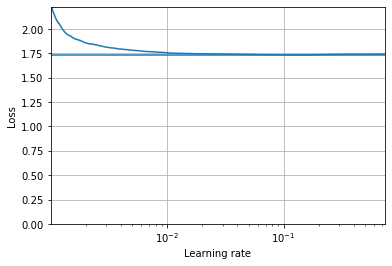

In [30]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [31]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=8e-1),
              metrics=["accuracy"])

/Users/maxleroux/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [33]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
#The model needs to be recalled each time.

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))

early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1327/1327 [==============================] - 32s 23ms/step - loss: 1.7379 - accuracy: 0.3032 - val_loss: 1.6774 - val_accuracy: 0.3278
Epoch 2/100
1327/1327 [==============================] - 19s 14ms/step - loss: 1.6584 - accuracy: 0.3300 - val_loss: 1.6956 - val_accuracy: 0.3296
Epoch 3/100
1327/1327 [==============================] - 20s 15ms/step - loss: 1.6478 - accuracy: 0.3399 - val_loss: 1.6589 - val_accuracy: 0.3304
Epoch 4/100
1327/1327 [==============================] - 26s 19ms/step - loss: 1.6416 - accuracy: 0.3411 - val_loss: 1.6606 - val_accuracy: 0.3322
Epoch 5/100
1327/1327 [==============================] - 24s 18ms/step - loss: 1.6369 - accuracy: 0.3440 - val_loss: 1.6605 - val_accuracy: 0.3326
Epoch 6/100
1327/1327 [==============================] - 25s 18ms/step - loss: 1.6321 - accuracy: 0.3499 - val_loss: 1.6802 - val_accuracy: 0.3024
Epoch 7/100
1327/1327 [==============================] - 25s 19ms/step - loss: 1.6282 - accuracy: 0.3507 - val_loss: 1

In [34]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)
model.evaluate(X_valid, y_valid)
model.evaluate(X_train, y_train)

1327/1327 [==============================] - 8s 6ms/step - loss: 1.7114 - accuracy: 0.3313


[1.7114393711090088, 0.33126044273376465]

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
1327/1327 [==============================] - 8s 6ms/step - loss: 4.1032 - val_loss: 3.2049
Epoch 2/20
1327/1327 [==============================] - 7s 5ms/step - loss: 3.2228 - val_loss: 3.1828
Epoch 3/20
1327/1327 [==============================] - 4s 3ms/step - loss: 3.2147 - val_loss: 3.1928
Epoch 4/20
1327/1327 [==============================] - 4s 3ms/step - loss: 3.2125 - val_loss: 3.1797
Epoch 5/20
1327/1327 [==============================] - 4s 3ms/step - loss: 3.2112 - val_loss: 3.1773
Epoch 6/20
1327/1327 [==============================] - 5s 4ms/step - loss: 3.2101 - val_loss: 3.1756
Epoch 7/20
1327/1327 [==============================] - 6s 4ms/step - loss: 3.2093 - val_loss: 3.1853
Epoch 8/20
1327/1327 [==============================] - 6s 5ms/step - loss: 3.2091 - val_loss: 3.1810
Epoch 9/20
1327/1327 [==============================] - 5s 4ms/step - loss: 3.2080 - val_loss: 3.1746
Epoch 10/20
1327/1327 [==============================] - 4s 3ms/step - loss: 3.208

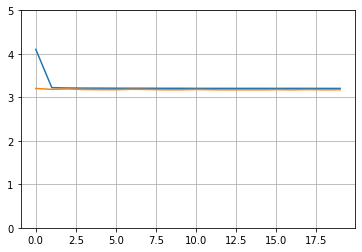

In [36]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 5)
plt.show()